Sang Choi

Gabriela De La Torr

Juan Banderas

Bioinformatics Project I

In [1]:
import numpy as np
import pandas as pd
import importlib
import scrape_pdb
importlib.reload(scrape_pdb)

from collections import Counter
from scrape_pdb import pdb_parser

pdb_parser = pdb_parser(int(input('Enter number of proteins to analyze (-1 to parse all but that will take a very long time so NOT RECOMMENDED)')))
pdb_parser.print_stats()

df_atom = pdb_parser.df_atom
df_sheet = pdb_parser.df_sheet
df_helix = pdb_parser.df_helix


Enter number of proteins to analyze (-1 to parse all but that will take a very long time so NOT RECOMMENDED)1000
parsing first 1000 proteins in cullpdb_pc30_res3.0_R1.0_d191017_chains18877.gz
completed parsing 500 pdbs
# atoms:1818888 # helices:8868 # sheets: 6883


Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/plp5595/.conda/envs/python36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/plp5595/.conda/envs/python36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/plp5595/.conda/envs/python36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/plp5595/.conda/envs/python36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/plp5595/.conda/envs/python36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/plp5595/.conda/envs/python36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/plp5595/.conda/envs/python36/lib/python3.6/multiprocessing/queues.py", 

1. Find the popularity of different kind of helices: read the data set and analyze it to find the
popularity of each type of helices. 

In [2]:
print("Helix Classes:",Counter(df_helix.helix_class))

Helix Classes: Counter({'1': 6498, '5': 2365, '10': 4, '7': 1})


Printed above are the classes of helices, shown with the number of times they appear in our helices dataframe. Here, we see that alpha-helix helices are the most popular in the helix classes, followed by 3-10, Polyproline, and lastly, Omega.

2. Analyze the amino acids that prefer to form/be part of helices. Does an AA prefer to
form/be part of specific type of helices?

In [3]:
# df_helix = pd.read_csv("df_export.csv", low_memory=False, header=0)
# df_helix.info()
print("Initial:",Counter(df_helix.init_res_name))
print("\nEnd",Counter(df_helix.end_res_name))

Initial: Counter({'ASP': 1103, 'SER': 1018, 'PRO': 796, 'ASN': 750, 'THR': 741, 'GLY': 644, 'ALA': 505, 'GLU': 462, 'LEU': 428, 'LYS': 373, 'ARG': 303, 'VAL': 284, 'GLN': 246, 'PHE': 238, 'HIS': 236, 'TYR': 222, 'ILE': 213, 'CYS': 111, 'TRP': 95, 'MET': 91, 'MSE': 8, 'SEP': 1})

End Counter({'GLY': 996, 'LEU': 935, 'ALA': 783, 'LYS': 582, 'ASN': 577, 'SER': 574, 'GLU': 540, 'ARG': 478, 'GLN': 448, 'ASP': 438, 'PHE': 397, 'THR': 391, 'VAL': 356, 'TYR': 331, 'ILE': 320, 'HIS': 258, 'MET': 189, 'CYS': 139, 'TRP': 97, 'MSE': 24, 'PRO': 13, 'CGU': 1, 'SEC': 1})


Here, we see the most popular residues in the helices portion of the data. With a little research, we see that this counter data (printed above) is pretty accurate to what is stated in some research statements, especially in the End Counter. Residues like Leucine, Alanine, Lysine, Glutamate, and Asparagine are found in the top half of the most popular residues in the helices dataframe.

3. Analyze the length of helices (in terms of number of AAs). Is there any relation between
the type of a helix and its length?

In [4]:
df_helix.drop_duplicates(subset=["helix_class", "length"], keep="last")

,record_name,serial_number,helix_id,init_res_name,init_chain_id,init_seq_num,init_iCode,end_res_name,end_chain_id,end_seq_num,end_iCode,helix_class,comment,length,protein_name
16,HELIX,6,6,ARG,A,143,,ARG,A,197,,5,,55,16VPA
206,HELIX,9,9,SER,A,176,,PHE,A,195,,5,,20,1AC5A
385,HELIX,3,3,ASP,A,454,,THR,A,477,,5,,24,1AZSA
722,HELIX,8,H,VAL,A,169,,ALA,A,259,,1,,76,1BIAA
838,HELIX,3,3,LYS,A,57,,PHE,A,63,,7,,7,1BUOA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8863,HELIX,9,9,ASN,A,203,,ASN,A,209,,1,,7,1MTZA
8864,HELIX,10,10,LYS,A,228,,ILE,A,232,,5,,5,1MTZA
8865,HELIX,11,11,THR,A,247,,ILE,A,258,,1,,12,1MTZA
8866,HELIX,12,12,LEU,A,272,,ASP,A,277,,1,,6,1MTZA


Here, we see samples from all types of helices in this dataset: 1, 5, 7, and 10. We see a very slight correlation here. Alpha helices seem to usually be in lengths between 10 and 30, a bit reserved, while 3-10 helices seem to over shoot the prior lengths with their own range of lengths: 15 to 60, a little bit more widespread. As for the Polyproline and Omega helices, their lengths seem very minimal/small, compared to the previous two helices mentioned. We see lengths less than 10 residues here, but these types of helices can range from the lengths seen here to the ballpark of 15.

4. Analyze   the   torsion   angles   in   each   type   of helices.Build   something   similar   to Ramachandran plot but for different types of helices.

In [6]:
# building dictionary of protein coordinate map to be able to look up AA coordinates quicker!
import utilities
importlib.reload(utilities)
from utilities import pdb_utilities

print('Preprocessing coordinate information for angle calculation. May take some time!')
pdb_util = pdb_utilities(df_atom, df_helix, df_sheet)

df_ram = pdb_util.build_ramachandran_helices()

Preprocessing coordinate information for angle calculation. May take some time!
building coordinates...
build_coordinates_lookup took 253.21432900428772s.....


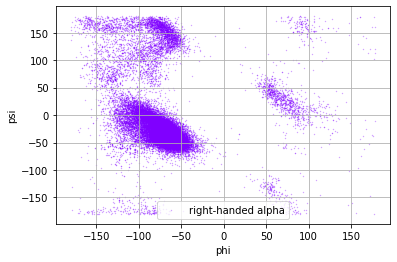

In [7]:
pdb_util.plot_ramachandran(df_ram[df_ram['helix_class'] == 1], 0.5, 0.1, 'helix_type')

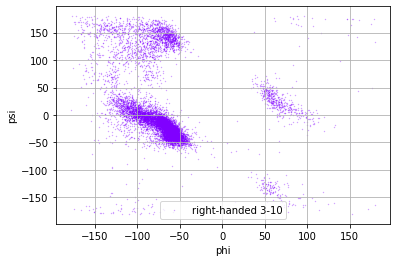

In [8]:
pdb_util.plot_ramachandran(df_ram[df_ram['helix_class'] == 5], 0.5, 0.1, 'helix_type')

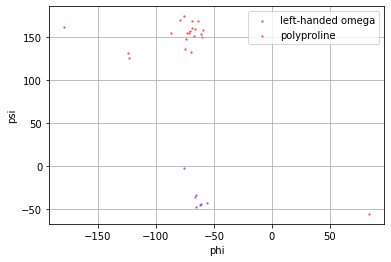

In [14]:
pdb_util.plot_ramachandran(df_ram[df_ram['helix_class'].isin([2, 3, 4, 6, 7, 8, 9, 10])], 0.5, 2, 'helix_type')

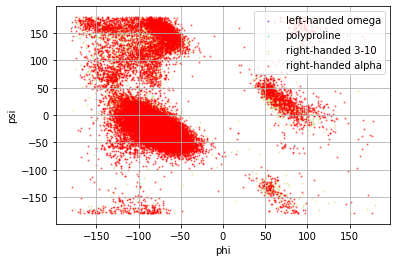

In [10]:
pdb_util.plot_ramachandran(df_ram, 0.5, 1, 'helix_type')

5. Analyze the amino acids that prefer to form/be part of beta-sheets. 

In [11]:
strands_df = df_sheet.drop_duplicates(subset=["protein_name", "sheet_id"], keep="last")
df_csv = strands_df.to_csv(r'C:\Users\g.m.de.la.torre\Documents\School Python\df_strands.csv', index = None, header=True)
print("-"*120,"\nCurrent:",Counter(df_sheet.cur_res_name))
print("\nDirection:",Counter(df_sheet.sense))
print("\nInitial:",Counter(df_sheet.init_res_name))
print("\nEnd:",Counter(df_sheet.end_res_name))

print("\nStrands:",Counter(strands_df.num_strands))


------------------------------------------------------------------------------------------------------------------------ 
Current: Counter({'VAL': 993, 'LEU': 714, 'ILE': 703, 'THR': 451, 'ALA': 436, 'TYR': 405, 'PHE': 386, 'GLY': 355, 'LYS': 355, 'ARG': 349, 'SER': 328, 'GLU': 323, 'GLN': 231, 'ASP': 166, 'HIS': 153, 'MET': 141, 'ASN': 140, 'TRP': 127, 'CYS': 98, 'PRO': 23, 'MSE': 6})

Direction: Counter({'-1': 4769, '1': 2114})

Initial: Counter({'VAL': 888, 'LEU': 607, 'ILE': 577, 'THR': 539, 'LYS': 479, 'GLY': 450, 'ALA': 384, 'GLU': 377, 'ARG': 372, 'TYR': 357, 'SER': 356, 'PHE': 353, 'GLN': 251, 'ASN': 174, 'ASP': 158, 'HIS': 152, 'MET': 109, 'TRP': 105, 'CYS': 93, 'PRO': 92, 'MSE': 8, 'TYI': 2})

End: Counter({'VAL': 664, 'LEU': 564, 'ILE': 541, 'SER': 519, 'ASP': 487, 'THR': 478, 'ALA': 399, 'PHE': 349, 'GLY': 324, 'PRO': 324, 'LYS': 320, 'TYR': 305, 'ARG': 295, 'GLU': 285, 'ASN': 273, 'GLN': 228, 'HIS': 182, 'CYS': 121, 'MET': 113, 'TRP': 103, 'MSE': 9})

Strands: Counter({'2'

6. Build Ramachandran plot for a given AA?

Please enter AA name to build Ramachandran plot for (i.e. VAL).TYR


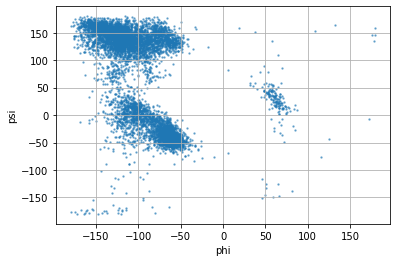

In [15]:
aa_input = str(input('Please enter AA name to build Ramachandran plot for (i.e. VAL).'))
df_aa_val = pdb_util.build_ramachandran_aa(aa_input)
pdb_util.plot_ramachandran(df_aa_val, 0.5, 2)

Please enter AA name to build Ramachandran plot for (i.e. VAL).HIS


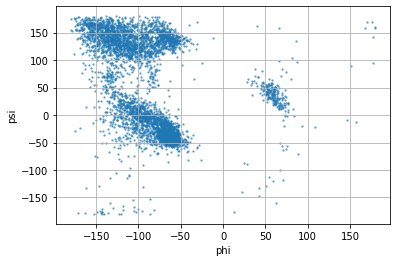

In [19]:
aa_input = str(input('Please enter AA name to build Ramachandran plot for (i.e. VAL).'))
df_aa_val = pdb_util.build_ramachandran_aa(aa_input)
pdb_util.plot_ramachandran(df_aa_val, 0.5, 2)

Please enter AA name to build Ramachandran plot for (i.e. VAL).GLU


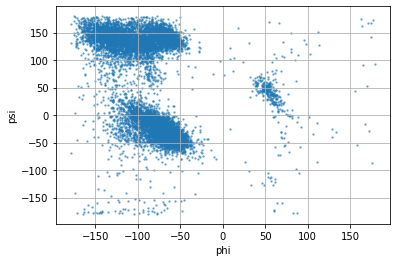

In [24]:
aa_input = str(input('Please enter AA name to build Ramachandran plot for (i.e. VAL).'))
df_aa_val = pdb_util.build_ramachandran_aa(aa_input)
pdb_util.plot_ramachandran(df_aa_val, 0.5, 2)

7. Analyze the length of bonds and the angle between different type of backbone atoms in
general and for individual AAs.

In [13]:
# df_atom = pd.read_csv('df_atom_export.csv')
protein_list = df_atom.drop_duplicates('protein_name')
# print(protein_list['protein_name'])

import math
import matplotlib.pyplot, pylab
import statistics

distance_list = []
def distance(x1, y1, z1, x2, y2, z2):  
       
    d = math.sqrt(math.pow(x2 - x1, 2) +
                math.pow(y2 - y1, 2) +
                math.pow(z2 - z1, 2)* 1.0) 
    distance_list.append(d)
    
def dis(protein):
    for index in protein.index:
        try:
            x1 = float(protein.iloc[index]['x'])
            y1 = float(protein.iloc[index]['y'])
            z1 = float(protein.iloc[index]['z'])
            x2 = float(protein.iloc[index+1]['x'])
            y2 = float(protein.iloc[index+1]['y'])
            z2 = float(protein.iloc[index+1]['z'])
            distance(x1, y1, z1, x2, y2, z2) 
        except IndexError:
            continue

for name in protein_list['protein_name']:
    df_pro_name = (df_atom[df_atom['protein_name'] == name])
    df_pro_name = (df_pro_name[df_pro_name['atom_name'] == 'CA']).reset_index(drop=True)
    dis(df_pro_name)

print('Distance from CA to CA')
print('Max:',max(distance_list))
print('Min:',min(distance_list))
print('Mean:',statistics.mean(distance_list))
print('Median:',statistics.median(distance_list))


KeyboardInterrupt: 